In [ ]:
#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Pranavtheking007/Nidan-2.0/main/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

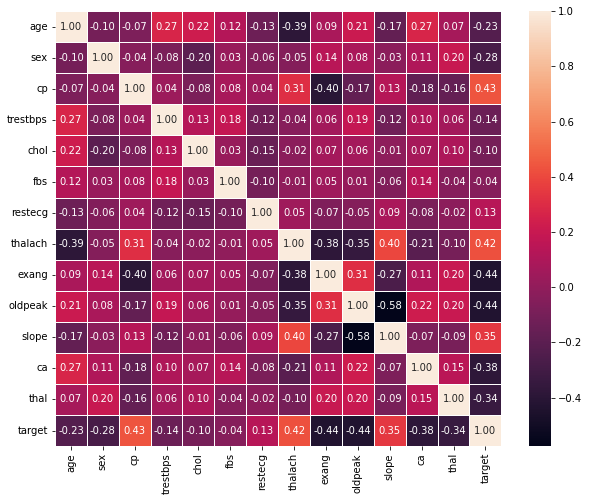

In [ ]:
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

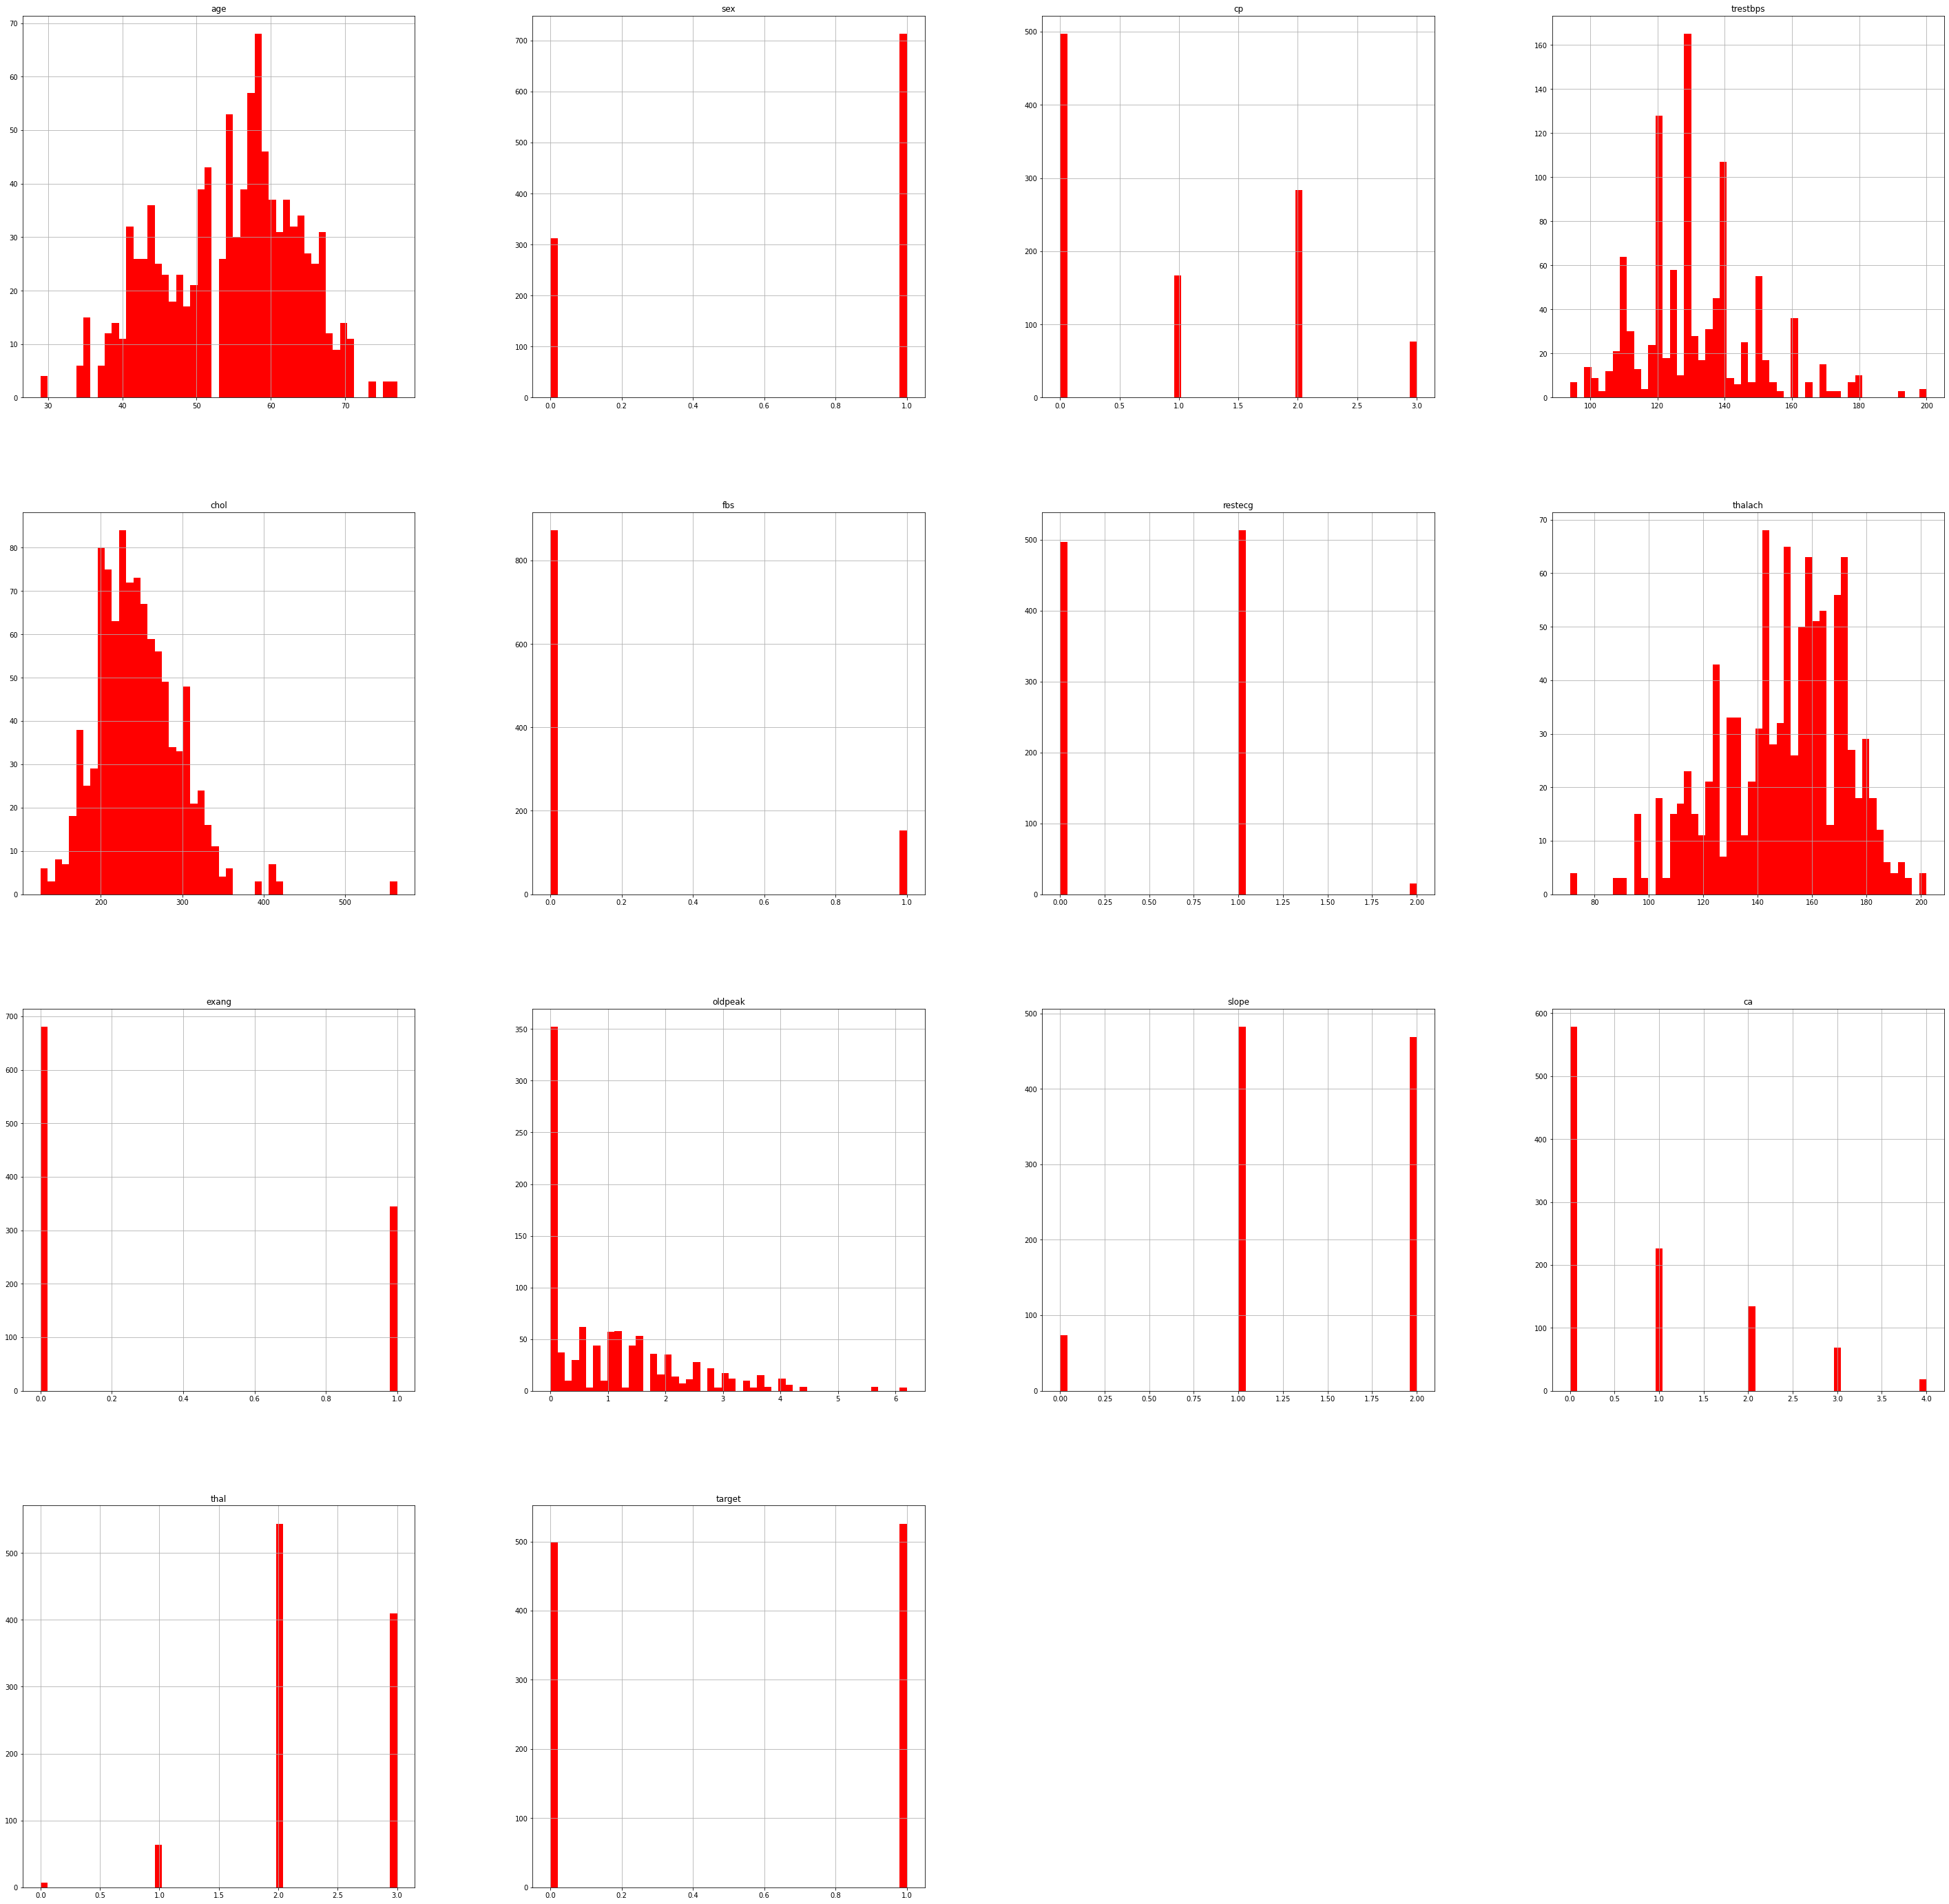

In [ ]:
df.hist(figsize=(50,50), bins=50, color="red");

<Axes: title={'center': 'Correlation with Heart_Disease Prediction'}>

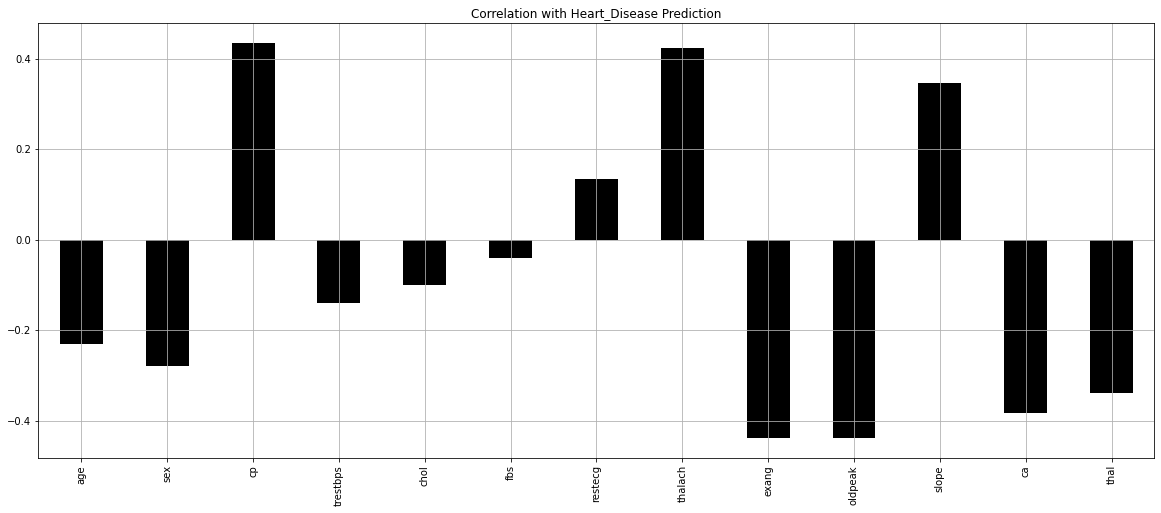

In [ ]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Heart_Disease Prediction",color="Black")

In [ ]:
df.drop('fbs',axis=1,inplace=True)

<Axes: >

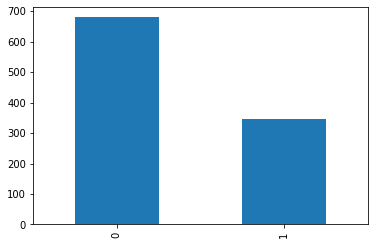

In [ ]:
df['exang'].value_counts().plot(kind='bar')

<Axes: >

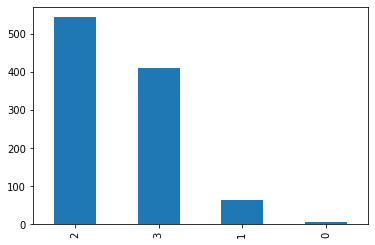

In [ ]:
df['thal'].value_counts().plot(kind='bar')

<Axes: >

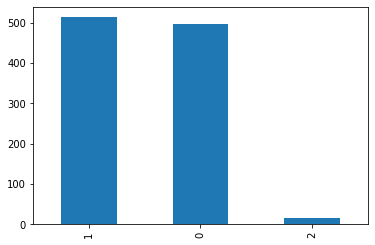

In [ ]:
df['restecg'].value_counts().plot(kind='bar')

In [ ]:
thal_i = []
y=0

for i in df['thal']:
  if i == 0:
    thal_i.append(y)

  y+=1

In [ ]:
thal_i

[14, 319, 329, 359, 686, 734, 893]

In [ ]:
restecg_i = []
y=0

for i in df['restecg']:
  if i == 2:
    restecg_i.append(y)

  y+=1

In [ ]:
restecg_i

[6, 29, 99, 150, 509, 535, 609, 611, 661, 716, 890, 965, 986, 1005, 1013]

In [ ]:
chol_i = []
y=0

for i in df['chol']:
  if i>500:
    chol_i.append(y)

  y+=1

In [ ]:
chol_i

[158, 192, 464]

In [ ]:
df.drop(thal_i,axis=0,inplace=True)
df.drop(restecg_i,axis=0,inplace=True)
df.drop(chol_i,axis=0,inplace=True)

<Axes: title={'center': 'Correlation with Heart_Disease Prediction'}>

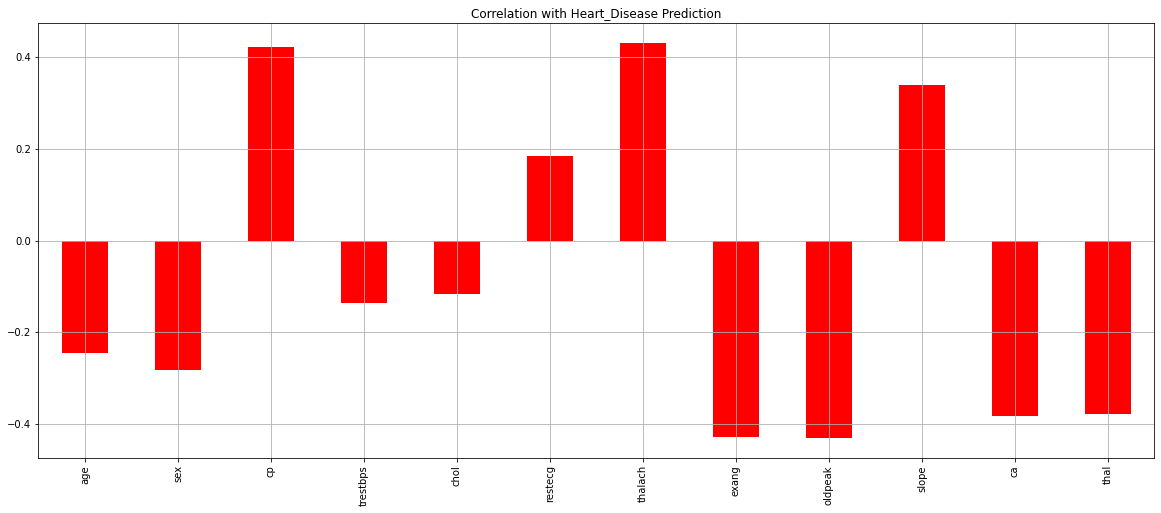

In [ ]:
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Heart_Disease Prediction",color="red")

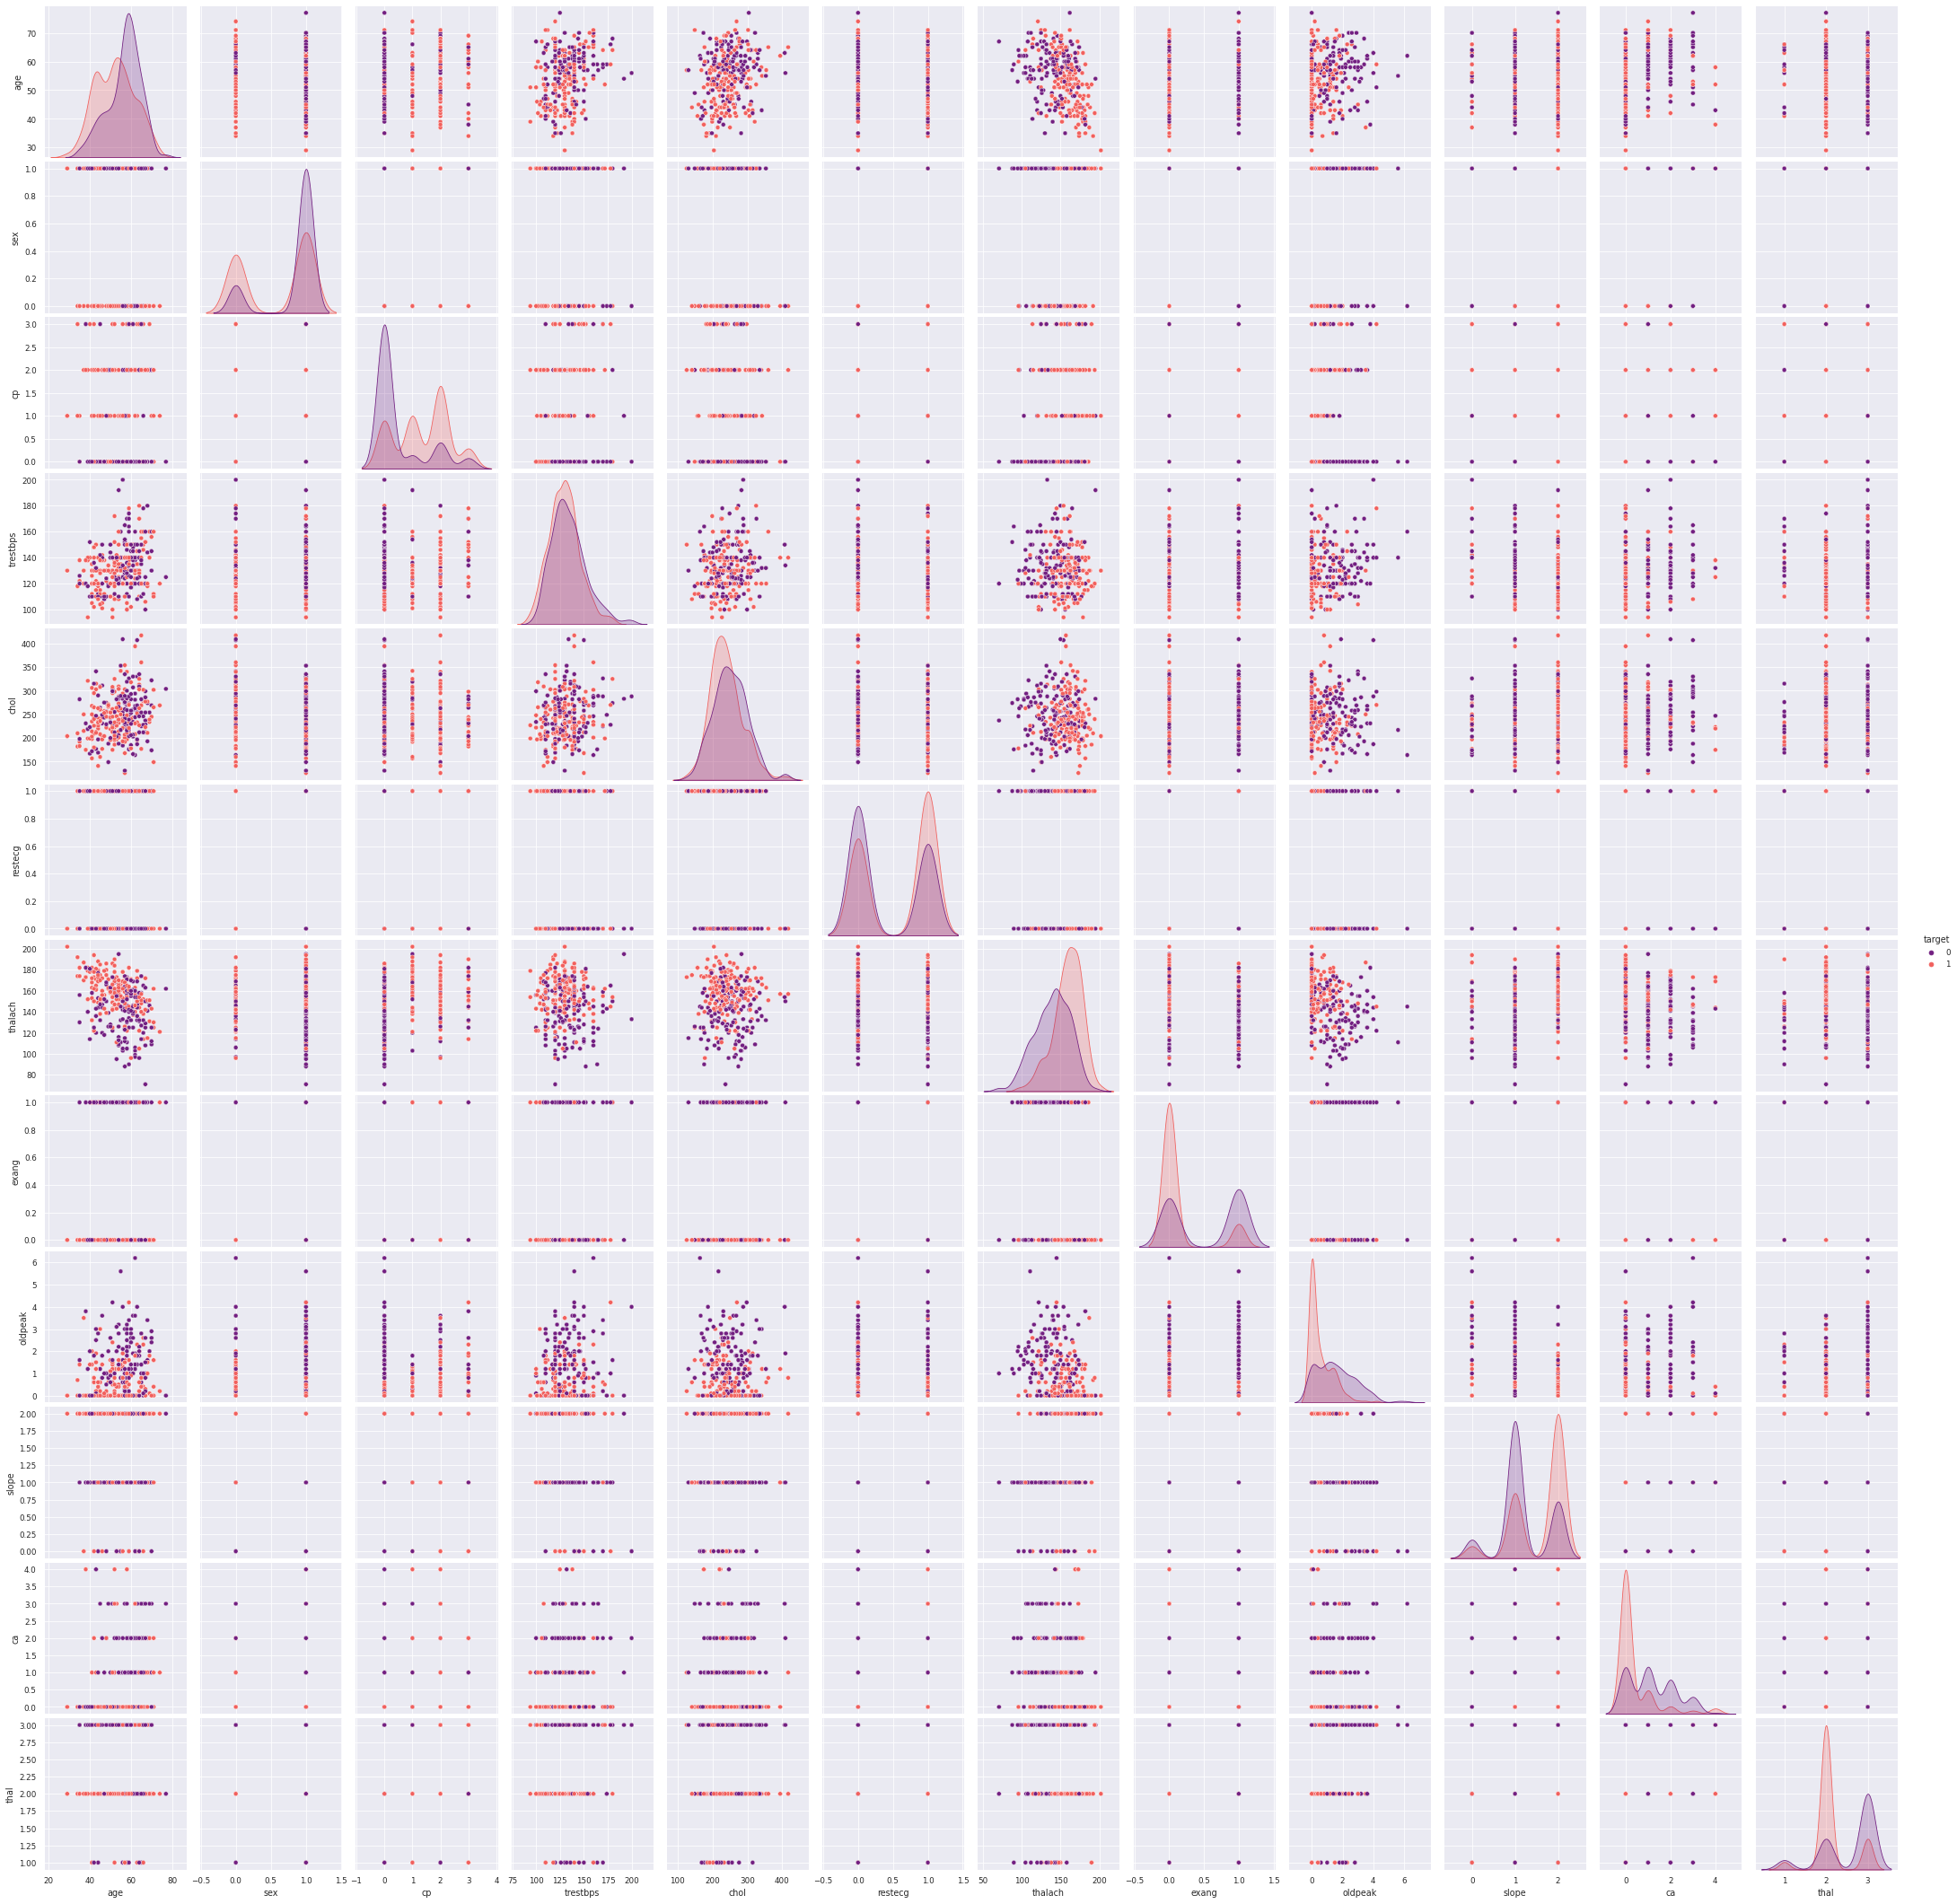

In [ ]:
sns.set_style("darkgrid")
sns.set('paper')
sns.pairplot(df, hue="target", palette='magma')
plt.show()

In [ ]:
Y = df['target']

In [ ]:
df.drop('target',axis=1,inplace=True)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(df, Y, test_size=0.2, random_state=42,stratify=df['ca'])

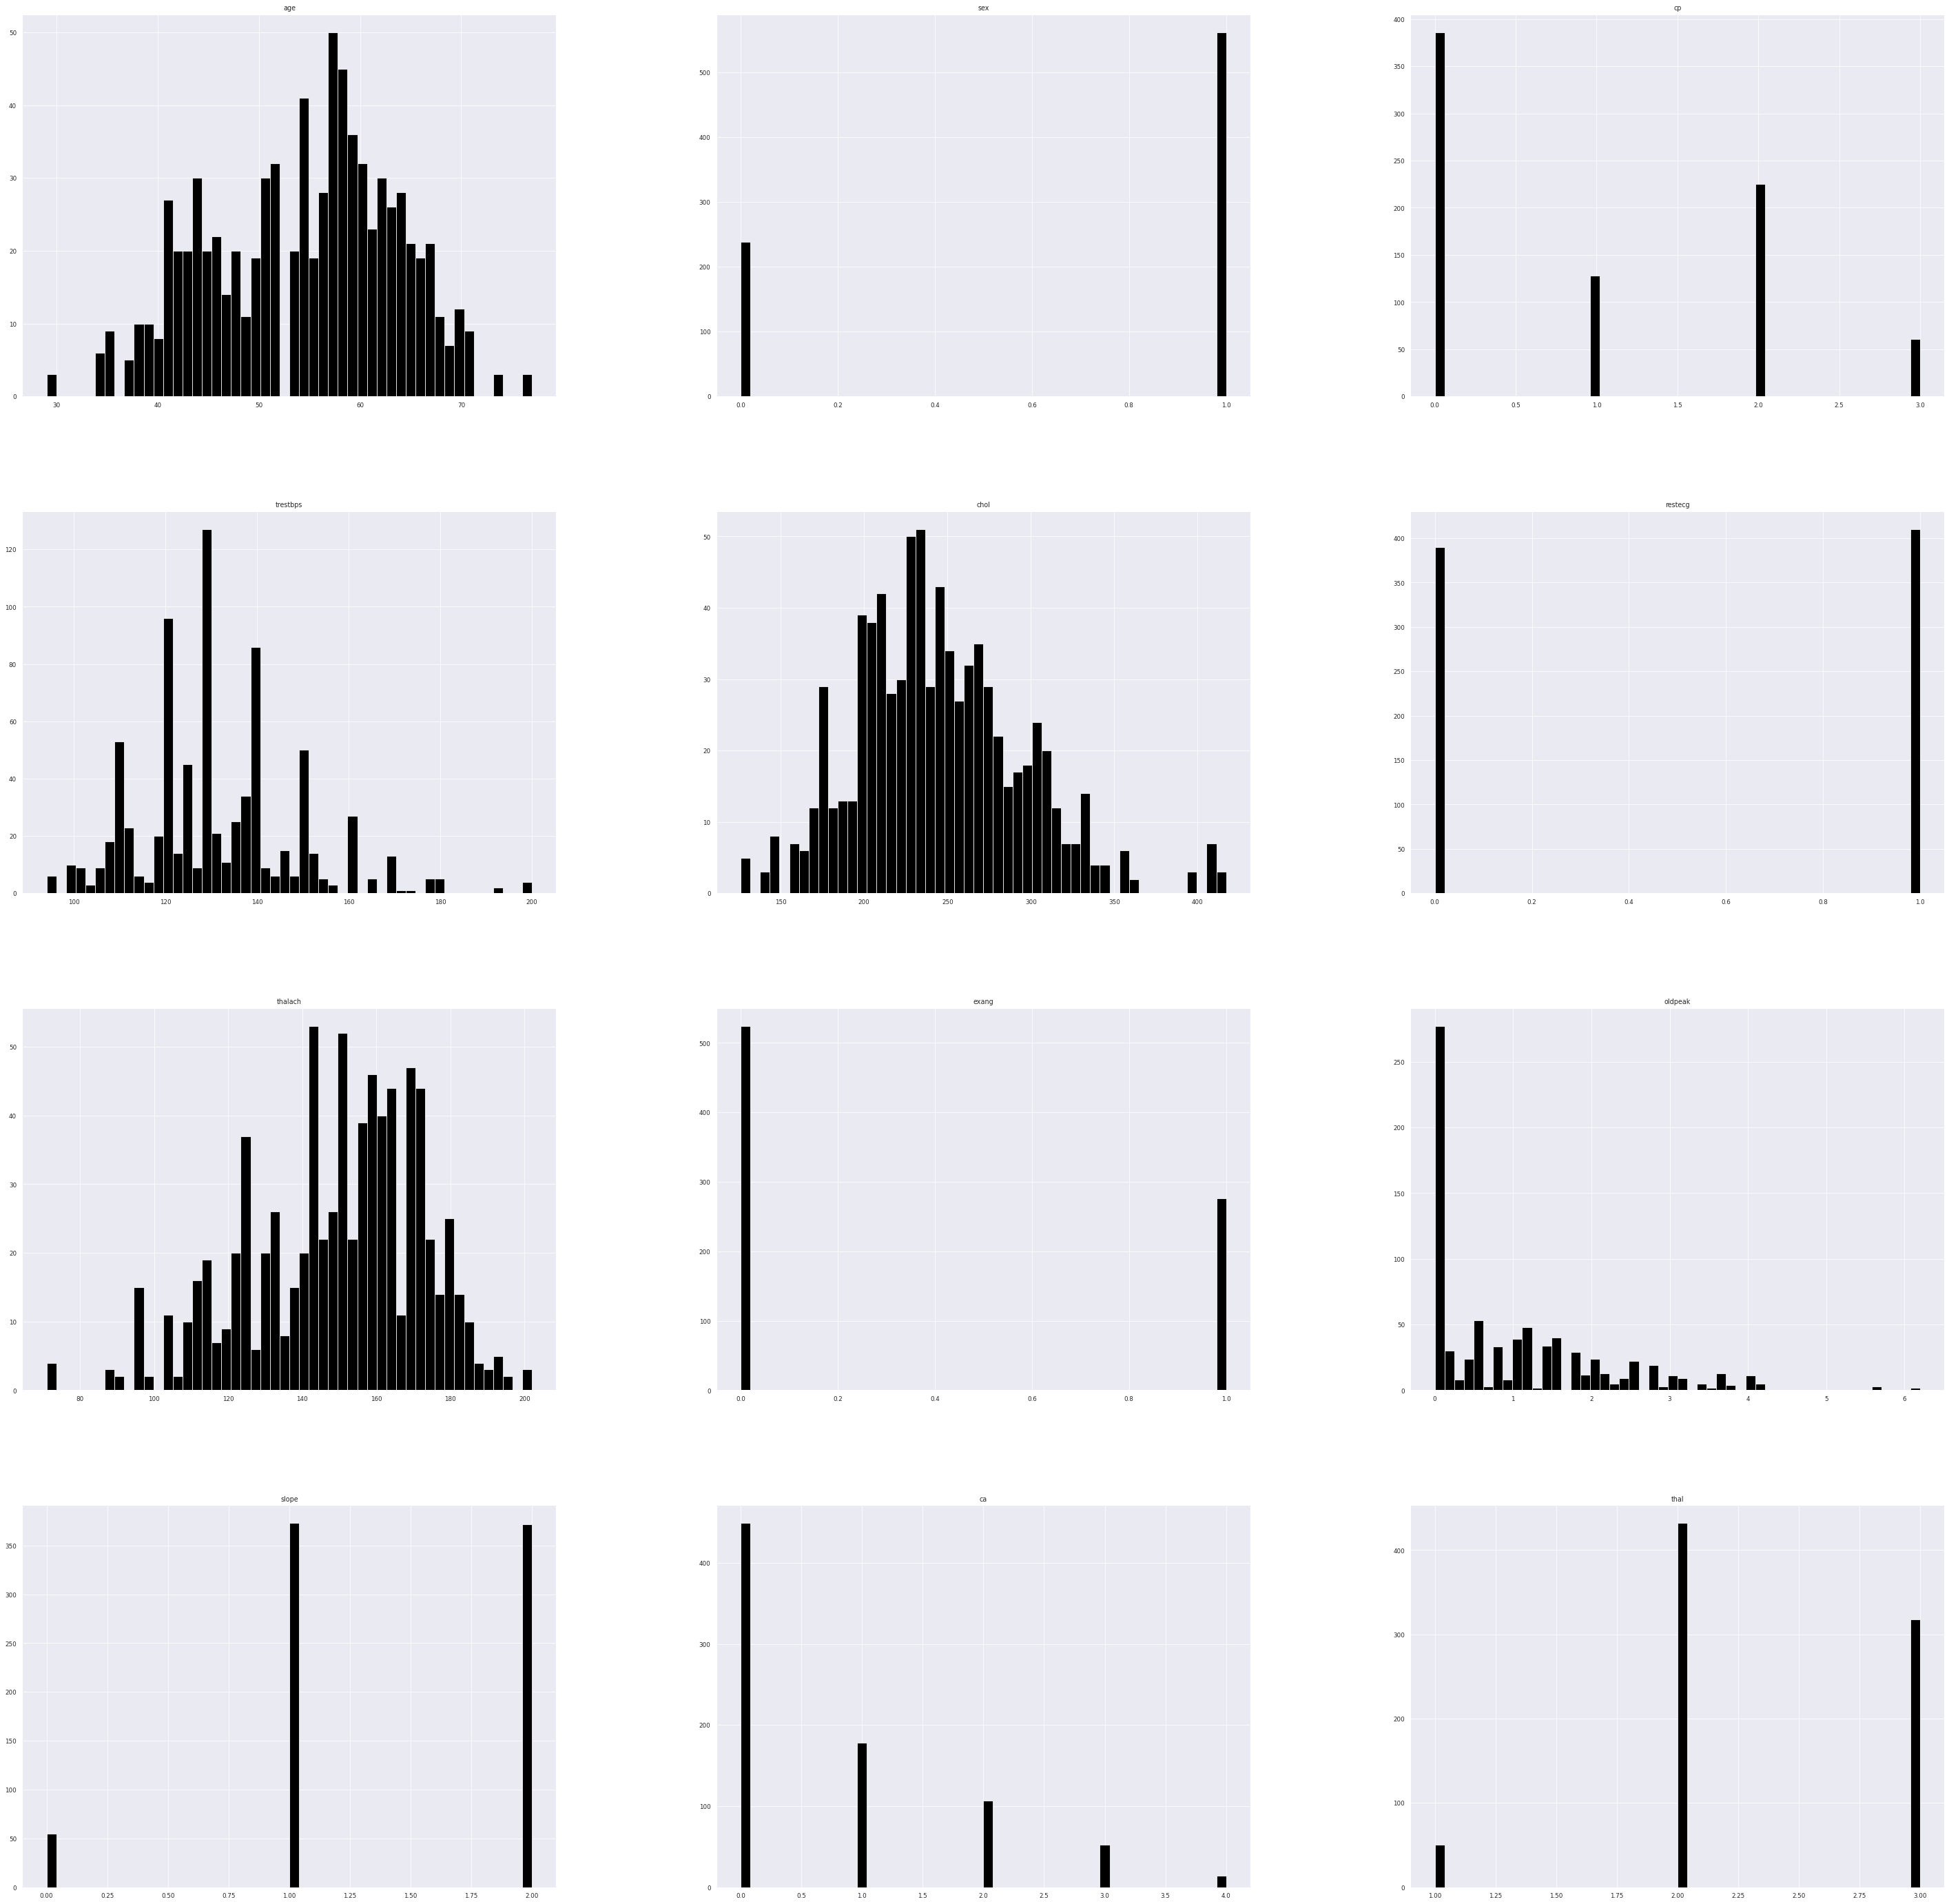

In [ ]:
X_train.hist(figsize=(50,50), bins=50, color="black");

<Axes: >

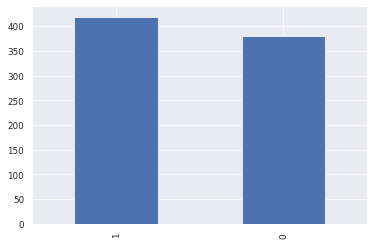

In [ ]:
Y_train.value_counts().plot(kind='bar')

In [ ]:
len(X_train.columns)

12

In [ ]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['slope','ca','thal','exang','restecg','cp','sex']),
    (OneHotEncoder(handle_unknown='ignore'),['age','chol','trestbps','thalach','oldpeak']))


In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['slope', 'ca', 'thal', 'exang', 'restecg',
                                  'cp', 'sex']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['age', 'chol', 'trestbps', 'thalach',
                                  'oldpeak'])])

In [ ]:
X_train_ct = ct.transform(X_train)
X_test_ct = ct.transform(X_test)

In [ ]:
Y_train=np.array(Y_train)
Y_Train = tf.constant(Y_train)

In [ ]:
len(Y_train)

800

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(2,activation='Softmax')
])

#Compile the Model
model_1.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['accuracy']
)

#Creating a CallBack
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#Fit the Model
history=model_1.fit(X_train_ct, Y_Train, epochs=200,callbacks=[lr_scheduler])

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.5962 - lr: 1.0000e-04
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.6300 - lr: 1.1220e-04
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6775 - lr: 1.2589e-04
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.7350 - lr: 1.4125e-04
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6535 - accuracy: 0.7625 - lr: 1.5849e-04
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6372 - accuracy: 0.7950 - lr: 1.7783e-04
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6133 - accuracy: 0.8112 - lr: 1.9953e-04
Epoch 8/200
25/25 [==============================] - 0s 5ms/step - loss: 0.5787 - accuracy: 0.8263 - lr: 2.2387e-04
Epoch 9/200
25/25 [==============================] - 0s 5ms/step - loss:

<Axes: >

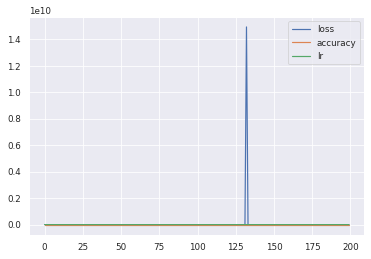

In [ ]:
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Learning Rate vs. Loss')

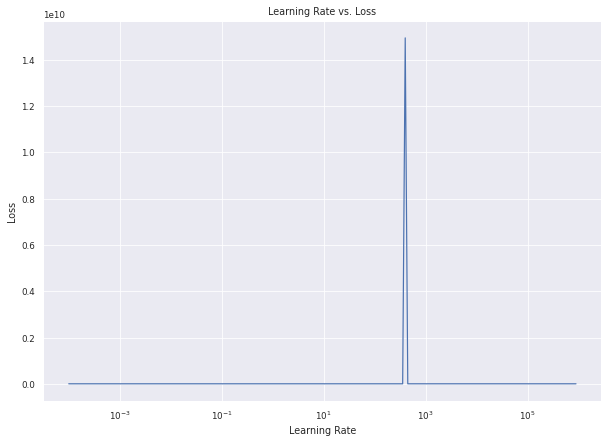

In [ ]:
#Plot the Learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(200)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(2,activation='Softmax')
])

#Compile the Model
model_2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
    metrics=['accuracy']
)


#Fit the Model
history_2=model_2.fit(X_train_ct, Y_Train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6909 - accuracy: 0.5225
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5337
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5325
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5362
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.5487
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5587
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6695 - accuracy: 0.5713
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6645 - accuracy: 0.5788
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6586 - accuracy: 0.5987
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6519 - accuracy: 0.6275
Epoch 11/50
25/25 [

In [ ]:
Y_pred = model_2.predict(X_test_ct)

7/7 [==============================] - 0s 4ms/step


In [ ]:
y_preds = Y_pred.argmax(axis=1)

In [ ]:
Y_test=np.array(Y_test)
y_test = tf.constant(Y_test)

In [ ]:
tf.math.confusion_matrix(y_test,y_preds)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[94,  8],
       [ 5, 93]], dtype=int32)>

In [ ]:
model_2.evaluate(X_test_ct,y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1968 - accuracy: 0.9350


[0.19677132368087769, 0.9350000023841858]

In [ ]:
model_2.save('Heart_Disease.h5')